In [27]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
plt.style.use('seaborn-bright')

In [2]:
tickers = ['AAPL', 'FB','AMZN','GE','TSLA']

In [3]:
data = yf.download(tickers, start='2020-01-01', end='2020-12-30')

[*********************100%***********************]  5 of 5 completed


In [4]:
data = data['Adj Close']
data.head()

,AAPL,AMZN,FB,GE,TSLA
Date,,,,,
2019-12-31,72.552094,1847.839966,205.250000,11.087033,83.666000
2020-01-02,74.207466,1898.010010,209.779999,11.851999,86.052002
2020-01-03,73.486023,1874.969971,208.669998,11.891738,88.601997
2020-01-06,74.071579,1902.880005,212.600006,12.060627,90.307999
2020-01-07,73.723213,1906.859985,213.059998,11.971215,93.811996


In [8]:
daily_return = data.pct_change()

In [9]:
annual_return = daily_return.mean()*250

In [12]:
cov_daily = daily_return.cov()
cov_annual = cov_daily * 250

In [13]:
p_return = []
p_vol = []
p_weights = []
n_assets = len(tickers)
n_port = 30000


In [14]:
for s in range(n_port):
    wgt = np.random.random(n_assets)
    wgt /= np.sum(wgt) # to make the weight 100%
    ret = np.dot(wgt, annual_return ) #find the expected return
    vol = np.sqrt(np.dot(wgt.T, np.dot(cov_annual, wgt)))
    p_return.append(ret)
    p_vol.append(vol)
    p_weights.append(wgt)
    

In [17]:
port_vol = np.array(p_vol)
p_returns = np.array(p_return)


In [29]:
colors = np.random.randint(0, n_port, n_port)

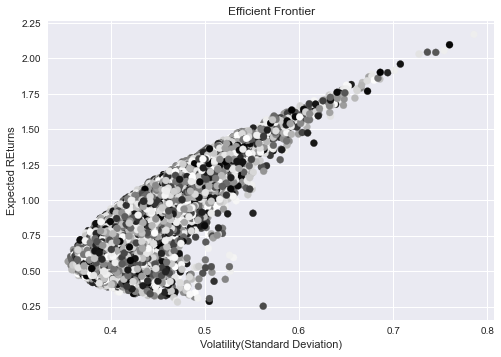

In [30]:
plt.figure
plt.scatter(port_vol,p_returns, c=colors, marker='o')
plt.xlabel('Volatility(Standard Deviation)')
plt.ylabel('Expected REturns')
plt.title('Efficient Frontier')
plt.show()